# Import data and do EDA

## Import required dependancies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 100)

## Load the data

In [2]:
import os
nb_dir = os.path.abspath("")
data_dir = os.path.join(nb_dir, 'Data', 'Fuel.xlsx')
df = pd.read_excel(data_dir)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Rename the columns with easily understandable feature names

In [3]:
df.rename(columns={
  "MODELYEAR": "Year",
  "MAKE": "Manufacturer",
  "MODEL": "ModelName",
  "VEHICLECLASS": "VehicleClass",
  "ENGINESIZE": "EngineSizeL",
  "CYLINDERS": "CylinderCount",
  "TRANSMISSION": "TransmissionType",
  "FUELTYPE": "FuelType",
  "FUELCONSUMPTION_CITY": "CityMPG",
  "FUELCONSUMPTION_HWY": "HighwayMPG",
  "FUELCONSUMPTION_COMB": "CombinedMPG",
  "FUELCONSUMPTION_COMB_MPG": "TotalMPG",
  "CO2EMISSIONS": "CO2Emissions"
}, inplace=True)

df.head()

,Year,Manufacturer,ModelName,VehicleClass,EngineSizeL,CylinderCount,TransmissionType,FuelType,CityMPG,HighwayMPG,CombinedMPG,TotalMPG,CO2Emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## EDA with Pandas
I could do it quickly with Pandas Profiling but the problem statement tells to use only numpy, pandas and matplotlib

In [4]:
print(f"The length of the dataframe =", len(df), '\n')
for column in df.columns:
  print(f"Number of unique elements in column '{column}' = ", df[column].nunique())
  print(f"Number of missing values in column '{column}' =", df[column].isna().sum())
  print('')

The length of the dataframe = 1067 

Number of unique elements in column 'Year' =  1
Number of missing values in column 'Year' = 0

Number of unique elements in column 'Manufacturer' =  39
Number of missing values in column 'Manufacturer' = 0

Number of unique elements in column 'ModelName' =  663
Number of missing values in column 'ModelName' = 0

Number of unique elements in column 'VehicleClass' =  16
Number of missing values in column 'VehicleClass' = 0

Number of unique elements in column 'EngineSizeL' =  45
Number of missing values in column 'EngineSizeL' = 0

Number of unique elements in column 'CylinderCount' =  7
Number of missing values in column 'CylinderCount' = 0

Number of unique elements in column 'TransmissionType' =  22
Number of missing values in column 'TransmissionType' = 0

Number of unique elements in column 'FuelType' =  4
Number of missing values in column 'FuelType' = 0

Number of unique elements in column 'CityMPG' =  167
Number of missing values in column 'Ci

## Findings from above output
- Model Name has high cardinality, so drop it.
- There are no missing values in the dataframe
- There is only 1 year of manufacture so no variation in that data, so drop that.

## Make a preprocessing function for the given dataset

In [5]:
def preprocess_dataset(df):
  '''
    Takes in the initial dataframe
    Does all preprocessing relevant to this dataset so as to make it ready for training
    Returns X, y
  '''
  # Make a copy of the original DataFrame to avoid 'SettingWithCopyWarning'
  df = df.copy()

  df.drop(['ModelName', 'Year'], inplace=True, axis=1) # Drop ModelName column due to high cardinality

  numeric_columns = ['EngineSizeL', 'CylinderCount', 'CityMPG',	'HighwayMPG',	'CombinedMPG', 'TotalMPG']
  for column in numeric_columns: # Scale down all the numerical features to the range of 0 to 1
    # df[column] = df[column] / df[column].max() # Assuming no non-numeric data or zero values in the numeric columns of the dataframe.
    # There maybe zero values in the columns too, so implement StandardScaler() of sklearn :
    mean = df[column].mean()
    std = df[column].std() # standard deviation
    df[column] = ( df[column] - mean ) / std

    df = pd.get_dummies(df)

  return df


# First I had implemented this function's logic below in the above function only, so that it returned X,y directly from the training and testing dataframes
# This was a major error because at the very end of this notebook, where I used this model to make predictions on the test data, it said that w_final was (85,) dimension but X_test[i] was (81,) dimension
# This is because I used the get_dummies function on X instead of the df: Major learning from this debugging.
def get_X_y_from_df(df):
  X = df.drop(['CO2Emissions'], axis=1) # Drop the target column
  y = df['CO2Emissions']
  return X, y

# Perform train test split

In [6]:
df = preprocess_dataset(df)

train_ratio = 0.8  # 80% of the data for training, 20% for testing

total_samples = len(df)
train_samples = int(train_ratio * total_samples)


# Randomly shuffle your DataFrame to ensure that your training and testing data are representative:
df = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame (use a specific random seed for reproducibility of code results)

train_df = df.iloc[:train_samples, :]  # First 'train_samples' number of rows for training
test_df = df.iloc[train_samples:, :]   # Remaining rows for testing

X_train, y_train = get_X_y_from_df(train_df)
X_test, y_test = get_X_y_from_df(test_df)

# Verify train-test-split :
print("Number of data points in X_train =", len(X_train))
print("Number of data points in X_test =", len(X_test))
print("Total number of datapoints in the dataframe was", len(df), '\n')
print("Total number of columns in the one-hot encoded dataset = len(X_train.columns) =", len(X_train.columns), '\n')

display(X_train)
print('\n')
display(X_test)

Number of data points in X_train = 853
Number of data points in X_test = 214
Total number of datapoints in the dataframe was 1067 

Total number of columns in the one-hot encoded dataset = len(X_train.columns) = 87 



,EngineSizeL,CylinderCount,CityMPG,HighwayMPG,CombinedMPG,TotalMPG,Manufacturer_ACURA,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_DODGE,Manufacturer_FIAT,Manufacturer_FORD,Manufacturer_GMC,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_INFINITI,Manufacturer_JAGUAR,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LAMBORGHINI,Manufacturer_LAND ROVER,Manufacturer_LEXUS,Manufacturer_LINCOLN,Manufacturer_MASERATI,Manufacturer_MAZDA,Manufacturer_MERCEDES-BENZ,Manufacturer_MINI,Manufacturer_MITSUBISHI,Manufacturer_NISSAN,Manufacturer_PORSCHE,Manufacturer_RAM,Manufacturer_ROLLS-ROYCE,Manufacturer_SCION,Manufacturer_SMART,Manufacturer_SRT,Manufacturer_SUBARU,Manufacturer_TOYOTA,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,VehicleClass_COMPACT,VehicleClass_FULL-SIZE,VehicleClass_MID-SIZE,VehicleClass_MINICOMPACT,VehicleClass_MINIVAN,VehicleClass_PICKUP TRUCK - SMALL,VehicleClass_PICKUP TRUCK - STANDARD,VehicleClass_SPECIAL PURPOSE VEHICLE,VehicleClass_STATION WAGON - MID-SIZE,VehicleClass_STATION WAGON - SMALL,VehicleClass_SUBCOMPACT,VehicleClass_SUV - SMALL,VehicleClass_SUV - STANDARD,VehicleClass_TWO-SEATER,VehicleClass_VAN - CARGO,VehicleClass_VAN - PASSENGER,TransmissionType_A4,TransmissionType_A5,TransmissionType_A6,TransmissionType_A7,TransmissionType_A8,TransmissionType_A9,TransmissionType_AM5,TransmissionType_AM6,TransmissionType_AM7,TransmissionType_AS4,TransmissionType_AS5,TransmissionType_AS6,TransmissionType_AS7,TransmissionType_AS8,TransmissionType_AS9,TransmissionType_AV,TransmissionType_AV6,TransmissionType_AV7,TransmissionType_AV8,TransmissionType_M5,TransmissionType_M6,TransmissionType_M7,FuelType_D,FuelType_E,FuelType_X,FuelType_Z
732,0.956075,1.226878,0.512884,0.331149,0.464517,-0.728564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
657,0.108555,0.114189,-0.486810,-0.670816,-0.568305,0.342573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
168,0.179181,0.114189,0.439736,0.152226,0.349759,-0.594672,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
86,-0.244579,0.114189,-0.462428,-0.778169,-0.568305,0.342573,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
411,-0.950846,-0.998500,-0.681873,-0.849738,-0.740442,0.610357,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.108555,0.114189,0.512884,0.545855,0.521896,-0.728564,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
826,-0.668339,-0.998500,-0.925701,-0.706600,-0.855200,0.878141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
663,-0.597712,0.114189,-0.364896,-0.277187,-0.338789,0.074789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
934,-0.668339,-0.998500,-0.584341,-0.312971,-0.482236,0.34

,EngineSizeL,CylinderCount,CityMPG,HighwayMPG,CombinedMPG,TotalMPG,Manufacturer_ACURA,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_DODGE,Manufacturer_FIAT,Manufacturer_FORD,Manufacturer_GMC,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_INFINITI,Manufacturer_JAGUAR,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LAMBORGHINI,Manufacturer_LAND ROVER,Manufacturer_LEXUS,Manufacturer_LINCOLN,Manufacturer_MASERATI,Manufacturer_MAZDA,Manufacturer_MERCEDES-BENZ,Manufacturer_MINI,Manufacturer_MITSUBISHI,Manufacturer_NISSAN,Manufacturer_PORSCHE,Manufacturer_RAM,Manufacturer_ROLLS-ROYCE,Manufacturer_SCION,Manufacturer_SMART,Manufacturer_SRT,Manufacturer_SUBARU,Manufacturer_TOYOTA,Manufacturer_VOLKSWAGEN,Manufacturer_VOLVO,VehicleClass_COMPACT,VehicleClass_FULL-SIZE,VehicleClass_MID-SIZE,VehicleClass_MINICOMPACT,VehicleClass_MINIVAN,VehicleClass_PICKUP TRUCK - SMALL,VehicleClass_PICKUP TRUCK - STANDARD,VehicleClass_SPECIAL PURPOSE VEHICLE,VehicleClass_STATION WAGON - MID-SIZE,VehicleClass_STATION WAGON - SMALL,VehicleClass_SUBCOMPACT,VehicleClass_SUV - SMALL,VehicleClass_SUV - STANDARD,VehicleClass_TWO-SEATER,VehicleClass_VAN - CARGO,VehicleClass_VAN - PASSENGER,TransmissionType_A4,TransmissionType_A5,TransmissionType_A6,TransmissionType_A7,TransmissionType_A8,TransmissionType_A9,TransmissionType_AM5,TransmissionType_AM6,TransmissionType_AM7,TransmissionType_AS4,TransmissionType_AS5,TransmissionType_AS6,TransmissionType_AS7,TransmissionType_AS8,TransmissionType_AS9,TransmissionType_AV,TransmissionType_AV6,TransmissionType_AV7,TransmissionType_AV8,TransmissionType_M5,TransmissionType_M6,TransmissionType_M7,FuelType_D,FuelType_E,FuelType_X,FuelType_Z
818,-0.668339,-0.998500,-0.681873,-0.456109,-0.596995,0.476465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
869,0.037928,0.114189,-0.316131,-0.277187,-0.310099,0.074789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
676,0.108555,0.114189,-1.315825,-0.312971,-0.969958,1.012033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
317,-0.950846,-0.998500,-0.828169,-0.885522,-0.855200,0.878141,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
648,1.167955,1.226878,2.609804,2.549784,2.616230,-1.665808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.179181,0.114189,0.220291,-0.026696,0.120243,-0.326887,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
466,-0.668339,-0.998500,-0.438045,-0.456109,-0.453547,0.208681,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
121,0.744195,1.226878,0.707946,0.510071,0.636654,-0.862456,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1044,-1.092099,-0.998500,-0.803787,-0.921307,-0.855200,0

# Linear Regression from scratch  
- **Problem Statement:** Make a Linear Regression ML model from scratch (only numpy and pandas is allowed) such that it is as close as possbile to the accuracy of the linear regression model of ML libraries like ScikitLearn and TensorFlow

# Implement the LinearRegression model

In [7]:
class LinearRegression:
  def __init__(self, lr=0.001, num_epochs=1000):
    self.lr = lr
    self.num_epochs = num_epochs
    self.weights = None
    self.bias = None

  def compute_cost(self, X, y):
    num_examples, num_features = X.shape
    cost = 0
    for i in range(num_examples):
      f_wb_i = np.dot(X[i], self.weights) + self.bias  # prediction for the i-th example
      cost_i = (f_wb_i - y[i]) ** 2   # squared error cost for the i-th example
      cost += cost_i
    cost = cost / (2 * num_examples)
    return cost

  def compute_gradient(self, X, y):
    # dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w
    # dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b
    num_examples, num_features = X.shape
    dj_dw = np.zeros(num_features)
    dj_db = 0
    for i in range(num_examples):
      err = (np.dot(X[i], self.weights) + self.bias) - y[i]
      dj_db += err
      dj_dw += err * X[i]
    dj_dw = dj_dw / num_examples
    dj_db = dj_db / num_examples
    return dj_db, dj_dw

  def gradient_descent(self, X, y, print_interval=10):
    import math
    J_history = [] # history of the cost function throughout the gradient descent
    for i in range(1, self.num_epochs + 1):
      dj_db, dj_dw = self.compute_gradient(X, y)
      # Update Parameters using computed gradients in each iteration
      self.weights = self.weights - self.lr * dj_dw
      self.bias = self.bias - self.lr * dj_db
      # Save cost J at each iteration
      cost = self.compute_cost(X, y)
      J_history.append(cost)
      # Print cost every: print_interval number of intervals
      if i == 1 or i % math.ceil(self.num_epochs / print_interval) == 0:
        print(f"Epoch {i}: Cost {cost}")
    print('\n')
    return J_history # for plotting

  def fit(self, X, y, print_interval=10):
    # Convert X and y to numpy arrays if they are not already
    X = X.values if not isinstance(X, np.ndarray) else X
    y = y.values if not isinstance(y, np.ndarray) else y
    # Initialize parameters as zeroes
    num_examples, num_features = X.shape
    self.weights = np.zeros(num_features)
    self.bias = 0
    # Run the implemented Gradient Descent Algorithm
    J_history = self.gradient_descent(X, y, print_interval)
    return J_history

  def predict(self, X):
    X = X.values if not isinstance(X, np.ndarray) else X
    if len(X.shape) == 1: # for prediction on a single example
      X = X.reshape(1, -1)
    num_examples, num_features = X.shape
    y_pred = np.zeros(num_examples)
    for i in range(num_examples):
      y_pred[i] = np.dot(X[i], self.weights) + self.bias
    return y_pred

  def get_params(self):
    return self.weights, self.bias

# Train the LinearRegression model

In [8]:
model = LinearRegression(lr=0.01, num_epochs=10000)
J_hist = model.fit(X_train, y_train, print_interval=10)
w_final, b_final = model.get_params()
print(f"b found by gradient descent: {b_final}")
print("w found by gradient descent: ")
print(w_final)

Epoch 1: Cost 33816.78494295399
Epoch 1000: Cost 117.20121692717565
Epoch 2000: Cost 74.29217471033866
Epoch 3000: Cost 53.613677695124665
Epoch 4000: Cost 41.36487333304911
Epoch 5000: Cost 33.49906120633471
Epoch 6000: Cost 28.209386575444416
Epoch 7000: Cost 24.533932136458514
Epoch 8000: Cost 21.914420699027175
Epoch 9000: Cost 20.008486773959547
Epoch 10000: Cost 18.59740343529476


b found by gradient descent: 172.66003446111895
w found by gradient descent: 
[  2.87122742   4.23202364  21.27962876  14.92303051  19.72966412
 -11.92348085   3.81470525   4.25401299  10.04295783   6.1170821
   3.81178514   4.4304211    4.54223507   2.70958593   3.83792267
   4.70745479   3.66372233   4.75576633   4.09829242   3.41215387
   3.02318676   2.75644683   1.5072886    6.70801501   3.93439231
   5.56290045   5.93680722   1.63844606   2.02921368   6.28546376
   1.38599032   9.29254319   3.33013689   8.4967626    4.70852312
   5.12906481   8.22797963   4.31189376   3.19408941   0.
   0.9999133

## Plot the cost versus the iteration number curve

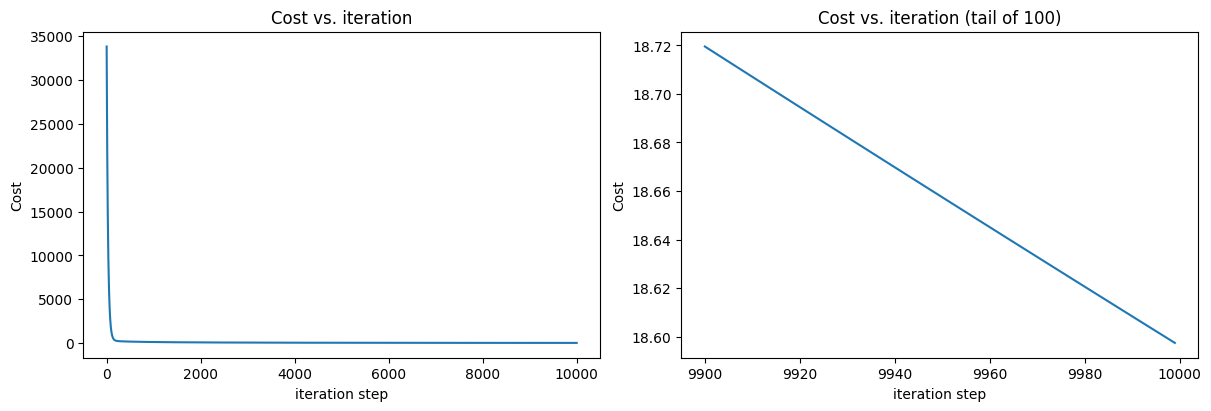

In [9]:
# Specify the number of data points to plot in the tail
tail_length = 100  # Change this value to the number you want to plot

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Plot the entire J_hist in the first subplot
ax1.plot(J_hist)

# Calculate the indices for the tail based on the specified length
start_index = max(0, len(J_hist) - tail_length)  # Ensure not to go below 0
end_index = len(J_hist)
ax2.plot(np.arange(start_index, end_index), J_hist[start_index:end_index])

# Set titles and labels for both subplots
ax1.set_title("Cost vs. iteration")
ax2.set_title(f"Cost vs. iteration (tail of {tail_length})")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')

# Show the plot
plt.show()

# Make a prediction using the linear regression model
You need to pre-process the data according to the pre-processing steps I used. I already implemented the code such that it does pre-processing while taking the sliced test_df and giving a X_test, y_test as output. So X_test is already pre-processed according to our needs. Let's now test the model on few values from X_test so that we can compare with y_test and see the accuracy of the model.

In [15]:
# Make a prediction using the model and compare it with the actual target value
import random
i = random.randrange(0, len(X_test))
y_hat = model.predict(X_test.iloc[i])

y_test = y_test.values if not isinstance(y_test, np.ndarray) else y_test
y = y_test[i]
print('yhat =', y_hat)
print('y =', y)

yhat = [233.14583893]
y = 225


# Check performance of the model

## Check R-Squared Error and RMSE of the model

In [16]:
# Total Sum of Squares (TSS) for the observed data. TSS is the total variation in the dependent variable (y).
# Residual Sum of Squares (RSS) for your model. RSS represents the variation that your model cannot explain and is the sum of squared residuals (errors).
y_pred = model.predict(X_test)
TSS = np.sum((y_test - y_test.mean()) ** 2)
RSS = np.sum((y_test - y_pred) ** 2)

R2 = 1 - (RSS / TSS)
print('R-Squared Error =', R2)

MSE = RSS / X_test.shape[0] # Mean Squared Error = RSS / num_examples
RMSE = MSE ** 0.5
print('Root Mean Squared Error (RMSE) =', RMSE)

R-Squared Error = 0.9887691012308971
Root Mean Squared Error (RMSE) = 6.424457048954364


## View the predicted vs the actual value in a plot

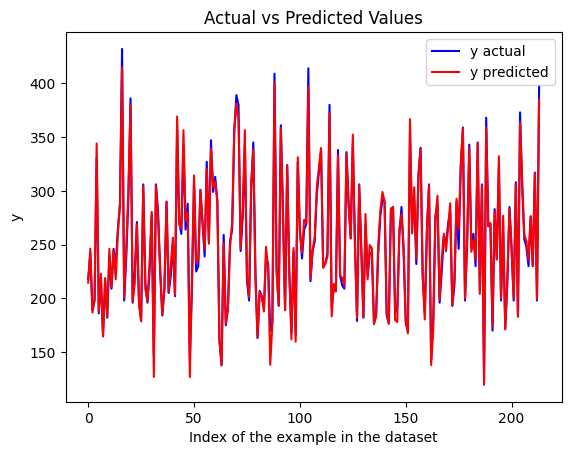

In [17]:
# Check the predicted vs actual values curves :
def plot_predicted_vs_actual(y, y_pred):
  plt.plot(y, label='y actual', color='blue')
  plt.plot(y_pred, label='y predicted', color='red')
  plt.xlabel("Index of the example in the dataset")
  plt.ylabel('y')
  plt.title('Actual vs Predicted Values')
  plt.legend()
  plt.show()

plot_predicted_vs_actual(y_test, y_pred) # Self implemented linear regression model

## Import the a model from sklearn, and compare our model with it

In [18]:
from sklearn.linear_model import SGDRegressor

In [20]:
model = SGDRegressor(max_iter=1000)
model.fit(X_train, y_train)
print(model)
print(f"number of epochs completed: {model.n_iter_}, number of weight updates: {model.t_}")

SGDRegressor()
number of epochs completed: 336, number of weight updates: 286609.0


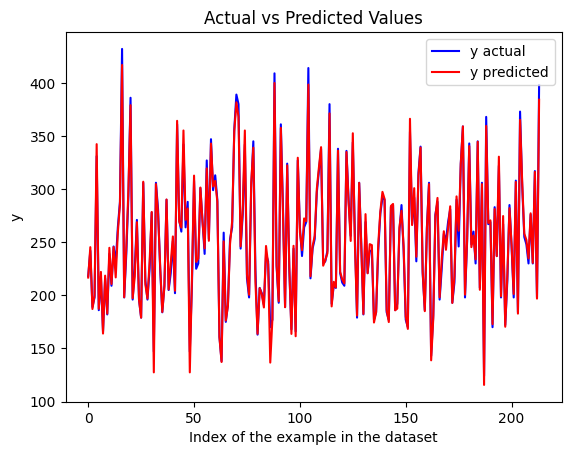

In [21]:
y_pred = model.predict(X_test)
plot_predicted_vs_actual(y_test, y_pred)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', r2)
print('Root Mean Squared Error (RMSE):', rmse)

R-squared (R2) Score: 0.9911950254739285
Root Mean Squared Error (RMSE): 5.6884405749250755


# **TO-DO**
1. Implement regularization. Though the overfitting effect is not much for linear regression, it is significant for polynomial regression.